## Estadística Aplicada
Sesión 9b - 12 septiembre


In [1]:
## Librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from lifelines import CoxPHFitter

In [3]:
import seaborn as sns

In [4]:
## Datos

df_cancer=pd.read_csv('https://raw.githubusercontent.com/jimmyzac/Estadistica-Aplicada-FCFM-UANL/main/bases_datos/cancer.csv')


In [5]:
df_cancer.head()

,inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss
0,3.0,306,2,74,1,1.0,90.0,100.0,1175.0,NaN
1,3.0,455,2,68,1,0.0,90.0,90.0,1225.0,15.0
2,3.0,1010,1,56,1,0.0,90.0,90.0,NaN,15.0
3,5.0,210,2,57,1,1.0,90.0,60.0,1150.0,11.0
4,1.0,883,2,60,1,0.0,100.0,90.0,NaN,0.0


Los datos constan de 228 observaciones y 10 variables/columnas. La descripción de las variables es la siguiente:
inst: código de institución\
**time (d1)**: tiempo de supervivencia en días\
**status (d2)**: estado de censura 1 = censurado, 2 = muerto\
**age (i1)**: Edad en años\
**sex (i2)**: Masculino = 1 Femenino = 2\
**ph.ecog (i3)**: puntuación de rendimiento ECOG según la calificación del médico. 0 = asintomático, 1 = sintomático pero completamente ambulatorio, 2 = en cama <50% del día, 3 = en cama > 50% del día pero no encamado, 4 = encamado\
**ph.karno (i4)**: puntuación de desempeño de Karnofsky (mala = 0; buena = 100) calificada por el médico\
**pat.karno (i4)**: puntuación de rendimiento de Karnofsky según la calificación del paciente\
**meal.cal (i5)**: Calorías consumidas en las comidas\
**wt.loss (i6)**: Pérdida de peso en los últimos seis meses

In [6]:
## Depurar y estadísticas descriptivas

## Recodificar variables dummy
df_cancer['status']=df_cancer['status']-1
df_cancer['sex']=df_cancer['sex']-1
# sex: 0:Hombre,1:Mujer

In [7]:
df_cancer=df_cancer.drop('inst',axis=1)

In [19]:
df_cancer.dtypes
#Todas las variables son númericas (enteros y decimales)

time           int64
status         int64
age            int64
sex            int64
ph.ecog        int64
ph.karno     float64
pat.karno    float64
meal.cal     float64
wt.loss      float64
dtype: object

In [9]:
## Contar los valores perdidos/faltantes (missing values)
df_cancer.isnull().sum()

time          0
status        0
age           0
sex           0
ph.ecog       1
ph.karno      1
pat.karno     3
meal.cal     47
wt.loss      14
dtype: int64

Cuando hay valores pérdidos hay dos opciones:
1. Eliminar las observaciones con valores perdidos
2. Imputar datos (prom). Se utiliza cuando la muestra es muy chica ya que no arriesgas perder mucha información

In [ ]:
## asignar a los valores perdidos el valor promedio de la variable
df_cancer['ph.karno']=df_cancer['ph.karno'].fillna(df_cancer['ph.karno'].mean())
df_cancer['pat.karno']=df_cancer['pat.karno'].fillna(df_cancer['pat.karno'].mean())
df_cancer['meal.cal']=df_cancer['meal.cal'].fillna(df_cancer['meal.cal'].mean())
df_cancer['wt.loss']=df_cancer['wt.loss'].fillna(df_cancer['wt.loss'].mean())
df_cancer=df_cancer.dropna()
df_cancer['ph.ecog']=df_cancer['ph.ecog'].astype('int64')

In [21]:
## Estadísticas descriptivas
df_cancer.describe()

,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss
count,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000
mean,306.264317,0.722467,62.458150,0.396476,0.951542,82.034971,79.999413,927.474067,9.734118
std,210.532764,0.448771,9.092045,0.490246,0.717872,12.240894,14.543193,358.375611,12.670492
min,5.000000,0.000000,39.000000,0.000000,0.000000,50.000000,30.000000,96.000000,-24.000000
25%,168.500000,0.000000,56.000000,0.000000,0.000000,80.000000,70.000000,768.000000,0.000000
50%,259.000000,1.000000,63.000000,0.000000,1.000000,80.000000,80.000000,928.779006,8.000000
75%,399.000000,1.000000,69.000000,1.000000,1.000000,90.000000,90.000000,1075.000000,15.000000
max,1022.000000,1.000000,82.000000,1.000000,3.000000,100.000000,100.000000,2600.000000,68.000000


El 39.47% son mujeres, el 72.46% de las personas fallecieron, la edad promedio es de 62.44, la edad más joven es 39 y la edad más alta es de 82. La media de ph.karno es mayor que la media de pat.karno que significa que los pacientes consideran su estado de salud mucho peor de lo que realmente es.

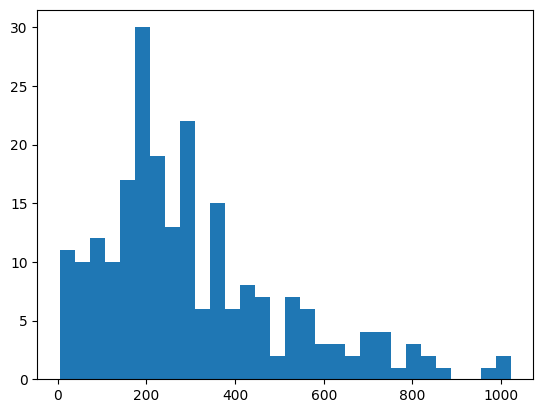

In [22]:
## Histograma del tiempo de supervivencia

plt.hist(df_cancer['time'],bins=30);

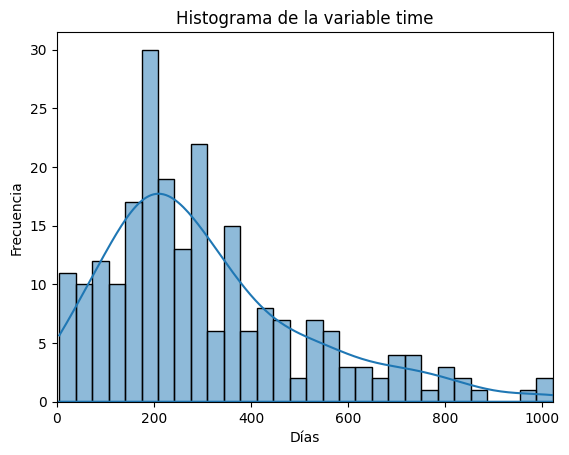

In [23]:
sns.histplot(df_cancer['time'],bins=30,kde=True)
sns.kdeplot(df_cancer['time'])
plt.xlim(0,1022)
plt.xlabel('Días')
plt.ylabel('Frecuencia')
plt.title('Histograma de la variable time')
plt.show()

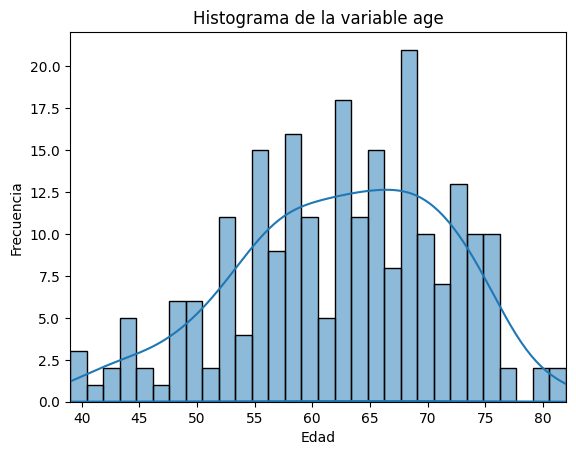

In [13]:
sns.histplot(df_cancer['age'],bins=30,kde=True)
sns.kdeplot(df_cancer['age'])
plt.xlim(39,82)
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.title('Histograma de la variable age')
plt.show()

In [27]:
## Estimar el modelo

cph1=CoxPHFitter()
cph1.fit(df_cancer,'time','status')

<lifelines.CoxPHFitter: fitted with 227 total observations, 63 right-censored observations>

In [28]:
cph1.print_summary()

ImportError: Missing optional dependency 'Jinja2'. DataFrame.style requires jinja2. Use pip or conda to install Jinja2.

<lifelines.CoxPHFitter: fitted with 227 total observations, 63 right-censored observations>
             duration col = 'time'
                event col = 'status'
      baseline estimation = breslow
   number of observations = 227
number of events observed = 164
   partial log-likelihood = -725.64
         time fit was run = 2023-09-13 21:38:36 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
age         0.01       1.01       0.01            -0.01             0.03                 0.99                 1.03
sex        -0.59       0.56       0.17            -0.92            -0.25                 0.40                 0.78
ph.ecog     0.62       1.85       0.18             0.26             0.98                 1.29                 2.66
ph.karno    0.02       1.02       0.01            -0.00             0.03                 1.00                 1.03
pat.karno  -0.01       0.99       0.01            -0.03             0.00                 0.97                 1.00
meal.cal    0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
wt.loss    -0.01       0.99       0.01            -0.02             0.00                 0.98                 1.00

            cmp to     z      p   -log2(p)
covariate                                 
age           0.00  1.35   0.18       2.49
sex           0.00 -3.44 <0.005      10.76
ph.ecog       0.00  3.35 <0.005      10.28
ph.karno      0.00  1.66   0.10       3.36
pat.karno     0.00 -1.77   0.08       3.70
meal.cal      0.00  0.10   0.92       0.12
wt.loss       0.00 -1.73   0.08       3.57
---
Concordance = 0.65
Partial AIC = 1465.28
log-likelihood ratio test = 37.68 on 7 df
-log2(p) of ll-ratio test = 18.13

Interpretación de los coeficientes.<br>
Empezamos con el p-value. <br>
Age: $p-value=0.18>\alpha$ :. No rechazamos H0, Age no tiene efecto en el riesgo de morir de cáncer.<br>
Sex: $p-value<\alpha$ :. Rechazamos H0, Sex si tiene efecto en el riesgo de morir de cáncer. Como tiene efecto en el riesgo de morir, observamos el coeficiente y vemos que tiene signo negativo (lo cual implica que se reduce el riesgo). Como las mujeres toman valor 1 en la variable sex, podemos decir que ser mujer reduce el riesgo de morir de cáncer en 44% respecto a los hombres.<br>
Ph.karno: $ p-value=0.10>\alpha $ :. No rechazamos H0, Ph.karno no tiene efecto en el riesgo de morir de cáncer<br>
Pat.karno: $ p-value=0.08>\alpha $ :. No rechazamos H0, Pat.karno no tiene efecto sobre el riesgo de morir de cáncer. <br>
Meal.cal: $p-value=0.92>\alpha $ :. No rechazamos H0, Meal.cal no tiene efecto sobre el riesgo de morir de cáncer. <br>
Wt.loss: $p-value=0.08>\alpha & :. No rechazamos H0, Wt-loss no tiene efecto sobre el riesgo de morir de cáncer. <br>
Ph.ecog: $p-value<\alpha$ :. Rechamos H0, Ph.ecog si tiene efecto en el riesgo de morir de cáncer. Aumenta el riesgo de morir de cáncer en 85% respecto a la categoría anterior.




## Cargar una nueva base

In [29]:
from lifelines.datasets import load_rossi

In [30]:
rossi=load_rossi()

In [31]:
rossi.head()

,week,arrest,fin,age,race,wexp,mar,paro,prio
0,20,1,0,27,1,0,0,1,3
1,17,1,0,18,1,0,0,1,8
2,25,1,0,19,0,1,0,1,13
3,52,0,1,23,1,1,1,1,1
4,52,0,0,19,0,1,0,1,3


In [33]:
cph2=CoxPHFitter().fit(rossi,'week','arrest')
cph2.print_summary()

ImportError: Missing optional dependency 'Jinja2'. DataFrame.style requires jinja2. Use pip or conda to install Jinja2.

<lifelines.CoxPHFitter: fitted with 432 total observations, 318 right-censored observations>
             duration col = 'week'
                event col = 'arrest'
      baseline estimation = breslow
   number of observations = 432
number of events observed = 114
   partial log-likelihood = -658.75
         time fit was run = 2023-09-13 22:11:47 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
fin        -0.38       0.68       0.19            -0.75            -0.00                 0.47                 1.00
age        -0.06       0.94       0.02            -0.10            -0.01                 0.90                 0.99
race        0.31       1.37       0.31            -0.29             0.92                 0.75                 2.50
wexp       -0.15       0.86       0.21            -0.57             0.27                 0.57                 1.30
mar        -0.43       0.65       0.38            -1.18             0.31                 0.31                 1.37
paro       -0.08       0.92       0.20            -0.47             0.30                 0.63                 1.35
prio        0.09       1.10       0.03             0.04             0.15                 1.04                 1.16

            cmp to     z      p   -log2(p)
covariate                                 
fin           0.00 -1.98   0.05       4.40
age           0.00 -2.61   0.01       6.79
race          0.00  1.02   0.31       1.70
wexp          0.00 -0.71   0.48       1.06
mar           0.00 -1.14   0.26       1.97
paro          0.00 -0.43   0.66       0.59
prio          0.00  3.19 <0.005       9.48
---
Concordance = 0.64
Partial AIC = 1331.50
log-likelihood ratio test = 33.27 on 7 df
-log2(p) of ll-ratio test = 15.37

Interpretación de los coeficientes. <br>
**Fin (Les dan dinero al salir de la cárcel)** <br>
$ p-value> \alpha $ :. No rechazamos $H_0$, por lo tanto el recibir dinero al salir de la cárcel no tiene efecto en que te vuelvan a arrestar. <br>
**Age** <br>
$ p-value< \alpha $ :. Rechazamos $H_0$, por lo tanto la edad si tiene efecto en que te vuelvan a arrestar. Observamos que el coeficiente es negativo y el exponencial es 0.94. Por lo que podemos decir que por cada año de edad que se cumple se reduce el riesgo en 6%. <br>
**Race** <br>
$ p-value> \alpha $ :. No rechazamos $H_0$, por lo tanto ser negro no tiene efecto sobre el riesgo de volver a ser arrestado. <br>
**Wexp, Mar (casado), Paro** <br>
Tdodos sus p-value son mayores a $\alpha$ por lo que no rechazamos $H_0$. Por lo tanto, no tienen efecto en el riesgo de volver a ser arrestado. <br>
**Prio** <br>
$p-value<\alpha$ :. Rechazamos $H_0$, por lo tanto el que te hayan arrestado antes, si influye en que te vuelvan a arrestar. Por cada vez que te han arrestado, el riesgo de que te vuelvan a arrestar aumenta en 10%.



## Apuntes
Signo: <br>
1. Coef $\Rightarrow$ aumenta/disminuye riesgo
2. exp(coef) $\Leftarrow$ tamaño del efecto
3. exp(coef)>1 $\Rightarrow$ exp(coef)-1
4. exp(coef)<1 $\Rightarrow$ 1-exp(coef)